<a href="https://colab.research.google.com/github/RomuloPaiva01/ICA/blob/master/fast_ica_distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

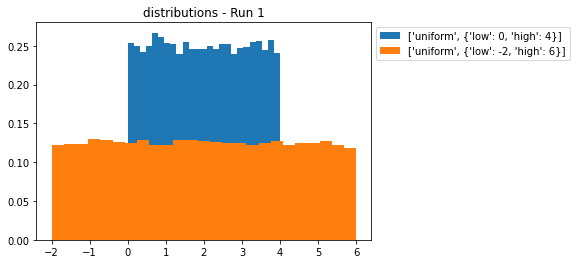

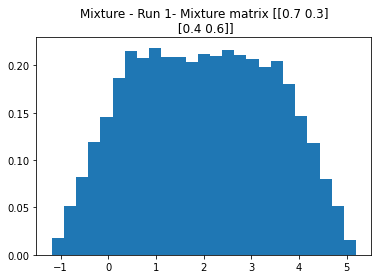

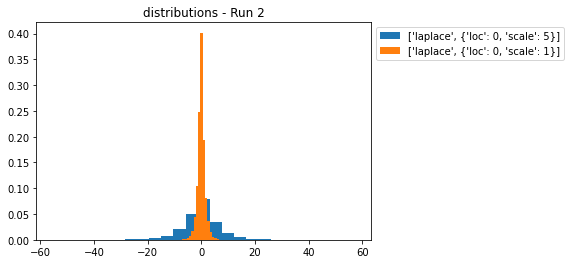

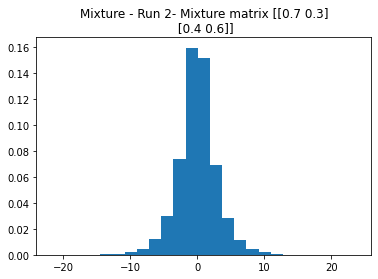

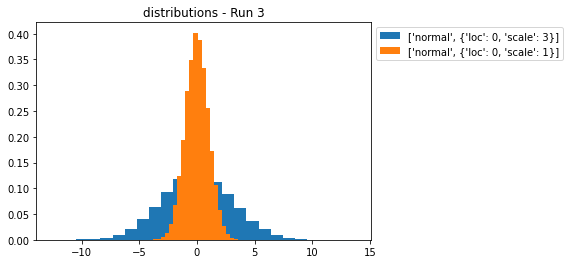

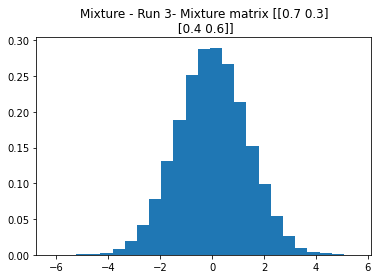

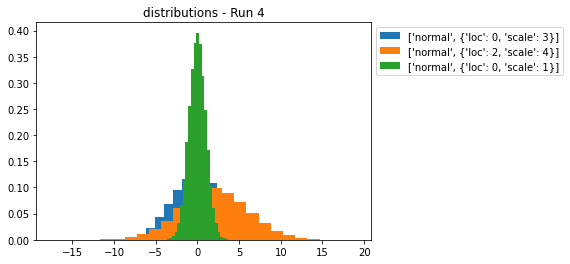

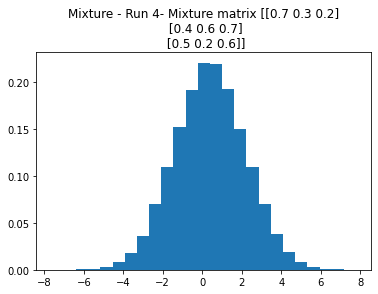

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
from mpl_toolkits.mplot3d import Axes3D

#creating the run object
class Run():
    def __init__(self, distributions, coefficients, sample_size, name, s, x, s_estimation):
        self.distributions = distributions #the distributions
        self.coefficients = coefficients #mixing matrix
        self.sample_size = sample_size #number of samples
        self.name = name #name of the run
        self.s = s #the sources
        self.x = x #the mixtures
        self.s_estimation = s_estimation #source estimations


    #fast ica method
    def fast_ica(self):
      transformer = FastICA(n_components=len(self.distributions), max_iter= 1000, random_state=0, whiten = True, algorithm='parallel', fun = 'cube')
      self.s_estimation = transformer.fit_transform(self.x)

    #generating the samples and the mixtures
    def generating_mixtures(self):
        #number of distributions of each run
        num_distr = len(self.distributions)
        
        #creating a list where we are going to put our data
        self.s = np.zeros((self.sample_size, num_distr))
        
        #for each distribution I get the data sample, where (a,b,...) means a from distribution1, b from dist 2 and so on
        for idx, distr in enumerate(self.distributions):
            
            self.s[:, idx] = distr["type"](size=(self.sample_size,), **distr["kwargs"])
          
        label_distr = []
        
        for i in range((num_distr)):
            label_distr.append([self.distributions[i]['type'].__name__,self.distributions[i]['kwargs']])
            plt.hist(self.s[np.arange(self.sample_size), i], bins=25, density=True)
        
        plt.title('distributions - ' + self.name)
        plt.legend(label_distr, bbox_to_anchor=(1,1), loc="upper left")
        plt.show()

        #mixing the data
        self.x = self.s @ self.coefficients.T

        #ploting the original distributions
        plt.hist(self.x[np.arange(self.sample_size), i], bins=25, density=True)
        plt.title('Mixture - ' + self.name + '- Mixture matrix '+ str(self.coefficients))
        plt.show()



    #plotting the original, the mixture and the estimation
    def plot_all(self):

      if len(self.distributions) == 2:
        #plotting method 2d
        def plot_joint(data, title):
          plt.scatter(data[0], data[1], s =1)
          plt.title(title)
          plt.show()

        plot_joint(self.s.T, self.name + ' | joint distribution of the independent components')
        plot_joint(self.x.T, self.name +  ' | joint distribution of the mixture')
        plot_joint(self.s_estimation.T, self.name + ' | joint distribution of the estimated sources')
        print('###############################################')


      if len(self.distributions) == 3:
        #plotting method 3d
        def plot_joint_3d(data, title):
          fig = plt.figure()
          ax = Axes3D(fig)
          ax.scatter(data[0], data[1], data[2])
          plt.title(title)
          plt.show()

        plot_joint_3d(self.s.T, self.name + ' | joint distribution of the independent components')
        plot_joint_3d(self.x.T, self.name +  ' | joint distribution of the mixture')
        plot_joint_3d(self.s_estimation.T, self.name + ' | joint distribution of the estimated sources')
        print('###############################################')

      else:

        pass


#runs   
run1 = Run(distributions = [
    {"type": np.random.uniform, "kwargs": {"low": 0, "high":4}},
    {"type": np.random.uniform, "kwargs": {"low": -2, "high":6}},],
    coefficients = np.array([[0.7, 0.3], [0.4, 0.6]]), #mixture matrix
    sample_size = 50000,
    name = 'Run 1',
    s = 0,
    x = 0,
    s_estimation = 0)

run2 = Run(distributions = [
    {"type": np.random.laplace, "kwargs": {"loc": 0, "scale": 5}},
    {"type": np.random.laplace, "kwargs": {"loc": 0, "scale": 1}}],
    coefficients = np.array([[0.7, 0.3], [0.4, 0.6]]),
    sample_size = 50000,
    name = 'Run 2',
    s = 0,
    x = 0,
    s_estimation = 0)

run3 = Run(distributions = [
    {"type": np.random.normal, "kwargs": {"loc": 0, "scale": 3}},
    {"type": np.random.normal, "kwargs": {"loc": 0, "scale": 1}}],
    coefficients = np.array([[0.7, 0.3], [0.4, 0.6]]),
    sample_size = 50000,
    name = 'Run 3',
    s = 0,
    x = 0,
    s_estimation = 0)


run4 = Run(distributions = [
    {"type": np.random.normal, "kwargs": {"loc": 0, "scale": 3}},
    {"type": np.random.normal, "kwargs": {"loc": 2, "scale":4}},
    {"type": np.random.normal, "kwargs": {"loc": 0, "scale": 1}}],
    coefficients = np.array([[0.7, 0.3, 0.2], [0.4, 0.6, 0.7], [0.5, 0.2, 0.6]]),
    sample_size = 50000,
    name = 'Run 4',
    s = 0,
    x = 0,
    s_estimation = 0)


lst_run = [run1, run2, run3, run4]


#generating and plotting the mixtures
for run in lst_run:

  run.generating_mixtures()



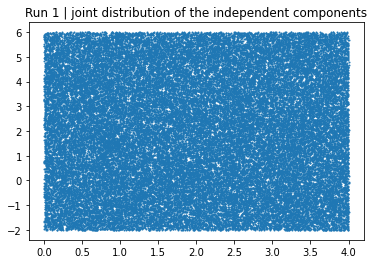

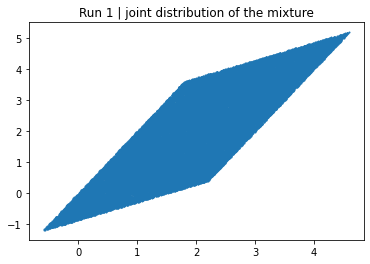

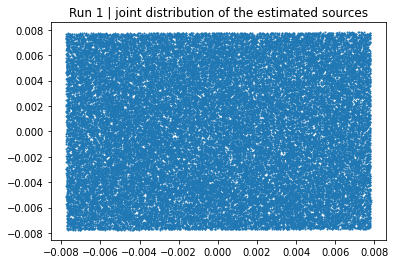

###############################################


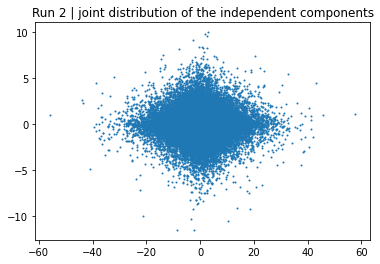

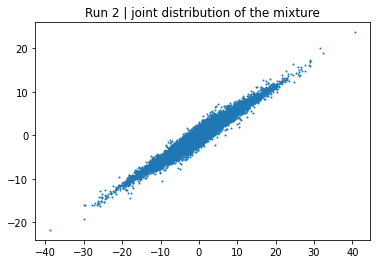

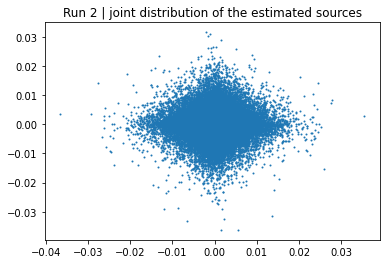

###############################################


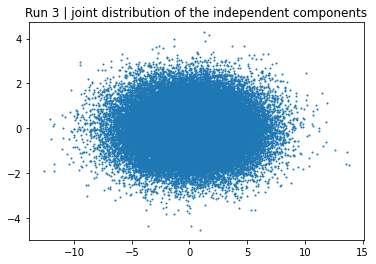

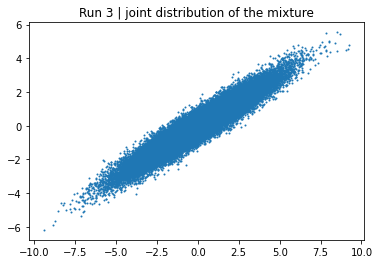

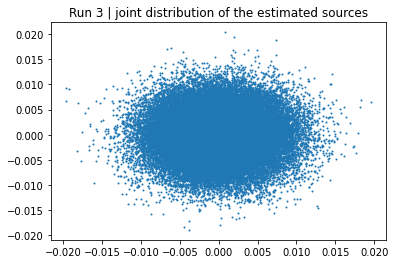

###############################################


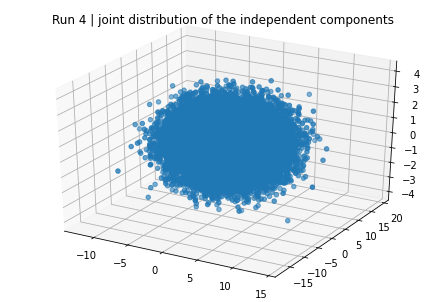

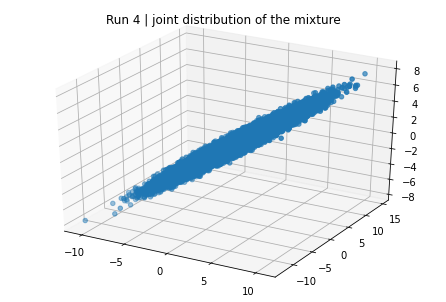

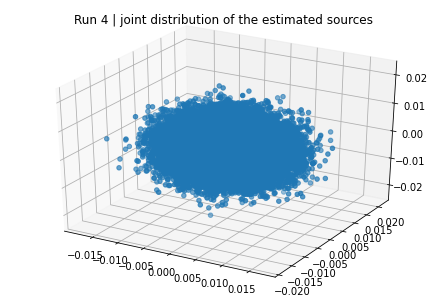

###############################################


In [2]:
for run in lst_run:

    #calling ica
    run.fast_ica()

    #plotting the results
    run.plot_all()